In [1]:
import bnpy
import numpy as np
import util

In [2]:
alloc_model = 'FiniteHMM'
obs_model = 'AutoRegGauss'
learn_alg = 'VB'
out_path = 'experiments/mocap-newargs'
dataset_title = 'MoCap6'

# Load data

In [3]:
dataset = util.load_mocap_data()

# Run experiment

In [4]:
K = 20
kwargs = {
    'ECovMat': 'diagcovfirstdiff',
    'sF': 0.5,
    'VMat': 'same',
    'sV': 0.5,
    'MMat': 'eye'
}

experiment = util.run_experiment(dataset, alloc_model, obs_model, learn_alg, K, out_path, **kwargs)

Training dense model
Dataset Summary:
GroupXData
  size: 6 units (documents)
  dimension: 12
Allocation Model:  None
Obs. Data  Model:  Auto-Regressive Gaussian with full covariance.
Obs. Data  Prior:  MatrixNormal-Wishart on each mean/prec matrix pair: A, Lam
  E[ A ] = 
  [[ 1.  0.]
   [ 0.  1.]] ...
  E[ Sigma ] = 
  [[ 0.14990727  0.        ]
   [ 0.          3.65403627]] ...
Initialization:
  initname = randexamples
  K = 20 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: VB | task  1/5 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: experiments/mocap-newargs/dense/1
        1/500 after      0 sec. |    129.4 MiB | K   20 | loss  2.632934182e+00 |  
        2/500 after      0 sec. |    129.9 MiB | K   20 | loss  2.395465918e+00 | Ndiff   61.088 
       25/500 after      3 sec. |    130.4 MiB | K   20 | loss  2.221555057e+00 | Ndiff    1.647 
       50/500 after      6 sec. |    130.6 MiB | K   20 | loss  2.219130524e+00 | Ndiff    0.035 


       50/500 after     11 sec. |    190.7 MiB | K   20 | loss  2.204800125e+00 | Ndiff    1.799 
       61/500 after     14 sec. |    190.7 MiB | K   20 | loss  2.203846620e+00 | Ndiff    0.000 
... done. converged.
Training sparse model L = 4
Learn Alg: VB | task  3/1 | alg. seed: 6168832 | data order seed: 7360256
task_output_path: experiments/mocap-newargs/sparse-L=4/3
        1/500 after      0 sec. |    197.9 MiB | K   20 | loss  2.707747109e+00 |  
        2/500 after      0 sec. |    197.6 MiB | K   20 | loss  2.468787409e+00 | Ndiff   83.108 
       25/500 after      5 sec. |    197.6 MiB | K   20 | loss  2.211578777e+00 | Ndiff    1.042 
       50/500 after     11 sec. |    197.6 MiB | K   20 | loss  2.209377431e+00 | Ndiff    0.036 
       75/500 after     16 sec. |    197.7 MiB | K   20 | loss  2.207786733e+00 | Ndiff    0.605 
       89/500 after     18 sec. |    197.7 MiB | K   20 | loss  2.206070367e+00 | Ndiff    0.000 
... done. converged.
Training O(L^2) model L = 4
L

In [5]:
# K = 20
# kwargs = {
#     'ECovMat': 'diagcovfirstdiff',
#     'sF': 0.5,
#     'VMat': 'same',
#     'sV': 0.5,
#     'MMat': 'eye'
# }

# experiment = util.append_OL2(dataset, alloc_model, obs_model, learn_alg, K, out_path, **kwargs)

# Plot results

In [6]:
# Load results if necessary
try:
    experiment
except NameError:
    experiment = util.load_experiment(out_path)

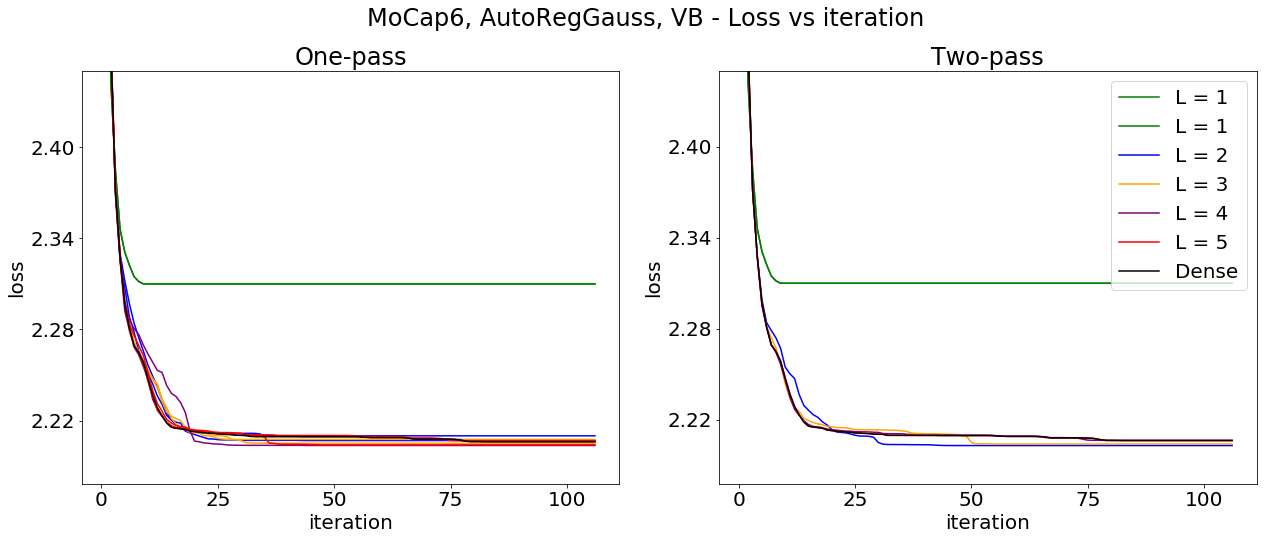

ValueError: x and y must have same first dimension, but have shapes (6,) and (10,)

In [7]:
util.plot_loss(experiment, dataset_title, ymax=2.45)

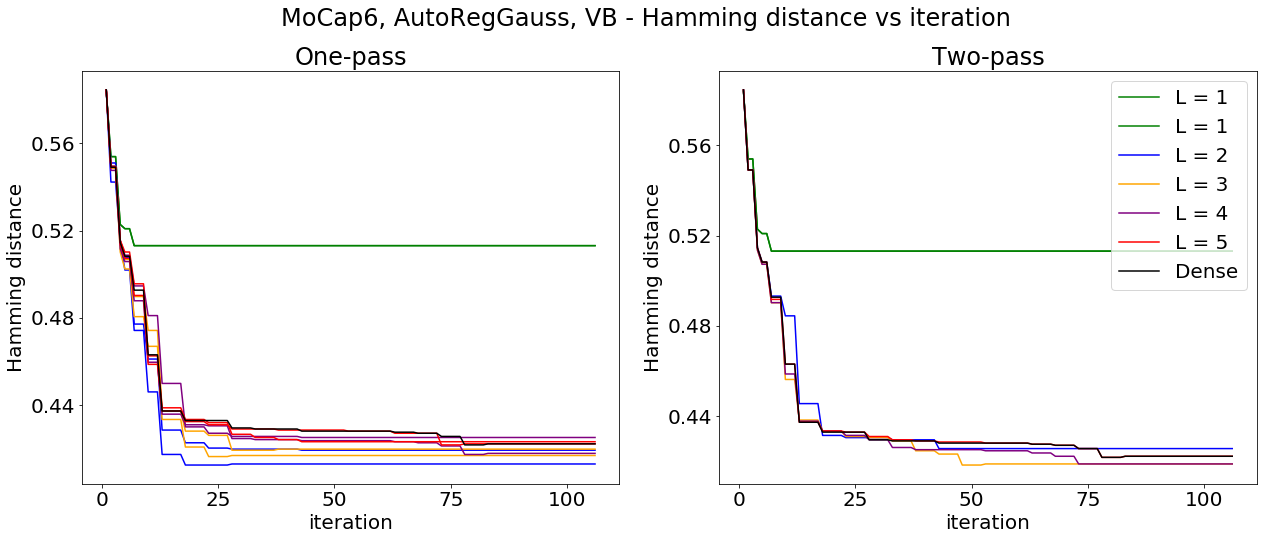

ValueError: x and y must have same first dimension, but have shapes (6,) and (10,)

In [8]:
util.plot_hamming(experiment, dataset_title)

In [15]:
len(dataset.TrueParams['Z'])

2058

In [16]:
import os
dataset_path = os.path.join(bnpy.DATASET_PATH, 'mocap6')
dataset1 = bnpy.data.GroupXData.read_npz(
    os.path.join(dataset_path, 'dataset.npz'))

In [17]:
len(dataset.TrueParams['Z'])

2058

In [18]:
len(dataset.X)

2058